In [57]:
#Exercise 2
#Find the airports for your country here. The data is in a CSV file.
#Create projected layer of airports.
#Plot all the layers and airports on top.
import os
import geopandas as gpd
import pandas as pd
from google.colab import drive
from IPython.display import display
from IPython import get_ipython
drive.mount('/content/drive')
shapefile_path = "/content/drive/My Drive/SHAPEFILE/contdv250kgw/contdv250kgw.shp"
mexico = gpd.read_file(shapefile_path)
airports=pd.read_csv("/content/drive/My Drive/SHAPEFILE/Aeropuertos/airports.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Eliminar la primera flecha
if not airports.empty:
  airports.drop(index=0, inplace=True)
  airports.reset_index(drop=True, inplace=True)
airports.head()
print(airports)

           id    ident            type                       name  \
0      323361     00AA   small_airport       Aero B Ranch Airport   
1        6524     00AK   small_airport               Lowell Field   
2        6525     00AL   small_airport               Epps Airpark   
3      506791     00AN   small_airport       Katmai Lodge Airport   
4      322127     00AS   small_airport             Fulton Airport   
...       ...      ...             ...                        ...   
83095   32753     ZYYY  medium_airport    Shenyang Dongta Airport   
83096   46378  ZZ-0001        heliport            Sealand Helipad   
83097  307326  ZZ-0002   small_airport  Glorioso Islands Airstrip   
83098  346788  ZZ-0003   small_airport      Fainting Goat Airport   
83099  313629     ZZZZ   small_airport     Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
0         38.704022    -101.473911        3435.0       NaN          US   
1         59.947733    

In [59]:
if not airports.empty:
  print(airports.head(3))
  print(airports.tail(3))

       id ident           type                  name  latitude_deg  \
0  323361  00AA  small_airport  Aero B Ranch Airport     38.704022   
1    6524  00AK  small_airport          Lowell Field     59.947733   
2    6525  00AL  small_airport          Epps Airpark     34.864799   

   longitude_deg  elevation_ft continent iso_country iso_region  municipality  \
0    -101.473911        3435.0       NaN          US      US-KS         Leoti   
1    -151.692524         450.0       NaN          US      US-AK  Anchor Point   
2     -86.770302         820.0       NaN          US      US-AL       Harvest   

  scheduled_service icao_code iata_code gps_code local_code home_link  \
0                no       NaN       NaN     00AA       00AA       NaN   
1                no       NaN       NaN     00AK       00AK       NaN   
2                no       NaN       NaN     00AL       00AL       NaN   

  wikipedia_link keywords  
0            NaN      NaN  
1            NaN      NaN  
2            NaN 

In [60]:
airports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [61]:
keep=['type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality']
airports=airports.loc[:,keep]

airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83100 entries, 0 to 83099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           83100 non-null  object 
 1   name           83100 non-null  object 
 2   latitude_deg   83100 non-null  float64
 3   longitude_deg  83100 non-null  float64
 4   elevation_ft   68607 non-null  float64
 5   continent      43939 non-null  object 
 6   iso_country    82832 non-null  object 
 7   iso_region     83100 non-null  object 
 8   municipality   78409 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.7+ MB


In [63]:
numeros_airpt=['latitude_deg', 'longitude_deg', 'elevation_ft']
airports[numeros_airpt]=airports[numeros_airpt].apply(pd.to_numeric)

In [64]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83100 entries, 0 to 83099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           83100 non-null  object 
 1   name           83100 non-null  object 
 2   latitude_deg   83100 non-null  float64
 3   longitude_deg  83100 non-null  float64
 4   elevation_ft   68607 non-null  float64
 5   continent      43939 non-null  object 
 6   iso_country    82832 non-null  object 
 7   iso_region     83100 non-null  object 
 8   municipality   78409 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.7+ MB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

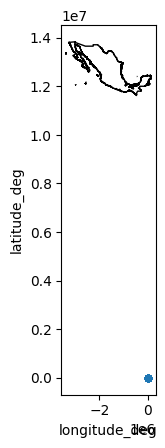

In [66]:
cities_mexico_6362=mexico.to_crs(5641)
base = cities_mexico_6362.plot(color='white', edgecolor='black')
airports.plot.scatter(x='longitude_deg', y='latitude_deg', ax=base)

<Axes: >

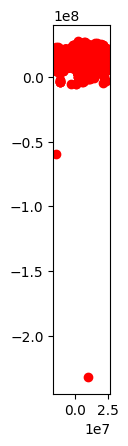

In [67]:
aeropuertos_mex=gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.longitude_deg, airports.latitude_deg), crs=mexico.crs.to_epsg())

base=mexico.to_crs(5641).plot(color='white', edgecolor='black')
aeropuertos_mex.to_crs(5641).plot(ax=base, color='red')

In [68]:
type(aeropuertos_mex), type(airports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

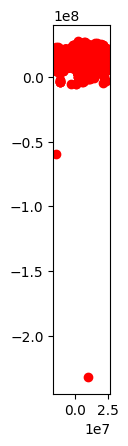

In [69]:
aeropuertos_mex_5641=aeropuertos_mex.to_crs(5641)

base=mexico.to_crs(5641).plot(color='white', edgecolor='black')
aeropuertos_mex_5641.plot(ax=base, color='red')

In [70]:
aeropuertos_mex_5641['type'].value_counts()

,count
type,
small_airport,42209
heliport,21845
closed,12591
medium_airport,4685
seaplane_base,1229
large_airport,484
balloonport,57


In [76]:
if not os.path.exists("maps"):
    os.makedirs("maps")

aeropuertos_mex_5641.rename(columns={'type':'kind'}, inplace=True)
aeropuertos_mex_5641.to_file(os.path.join("maps","mexicoMaps_5641.gpkg"), layer='airports', driver="GPKG")